# Using the relation between the accreted mass and period of equilibrium state for H (Li21) and L (Tauris12) model to calculate the accreted mass.

In [1]:
import numpy as np

def tauris_acc_m(p_birth):
    """
    see https://arxiv.org/abs/1206.1862 (Tauris12)  Eq.14
    paramaters：
    p_birth：the period of equilibrium state,unit: s
    return:
    The accreted mass given a period
    """
    return 0.22*(1.4**(1/3))/(p_birth*1000)**(4/3)

def li_acc_m(p_birth):
    """
    we fit the open circle in Figure 4. in arXiv:2108.02554v1 (Li21), and obtain parameters: a = 0.28, b=-0.5.
    paramaters：
    p_birth：the period of equilibrium state,unit: s
    return:
    The accreted mass given a period
    """
    a=0.30
    b=-0.5
    return a*(p_birth*1000)**b

def errf(p_birth):
    """
    the 1-sigma error is one-third of the difference between Tauris12  and the best fitted value for Li, ZW, et.al.(2021)
    paramaters：
    p_birth：the period of equilibrium state,unit: s
    return:
    The 1-sigma error bar for the accreted mass 
    """
    return (li_acc_m(p_birth)-tauris_acc_m(p_birth))*0.3


# Loading data

In [2]:
pran = np.loadtxt('plot_pran.txt')
delta_m_birth_ran = np.loadtxt('plot_delta_m_birth_ran.txt')
s_deltam_all = np.loadtxt('scatter_deltam_all.txt')

# plotting the figure $\Delta m$ $-$ $P_{eq}$

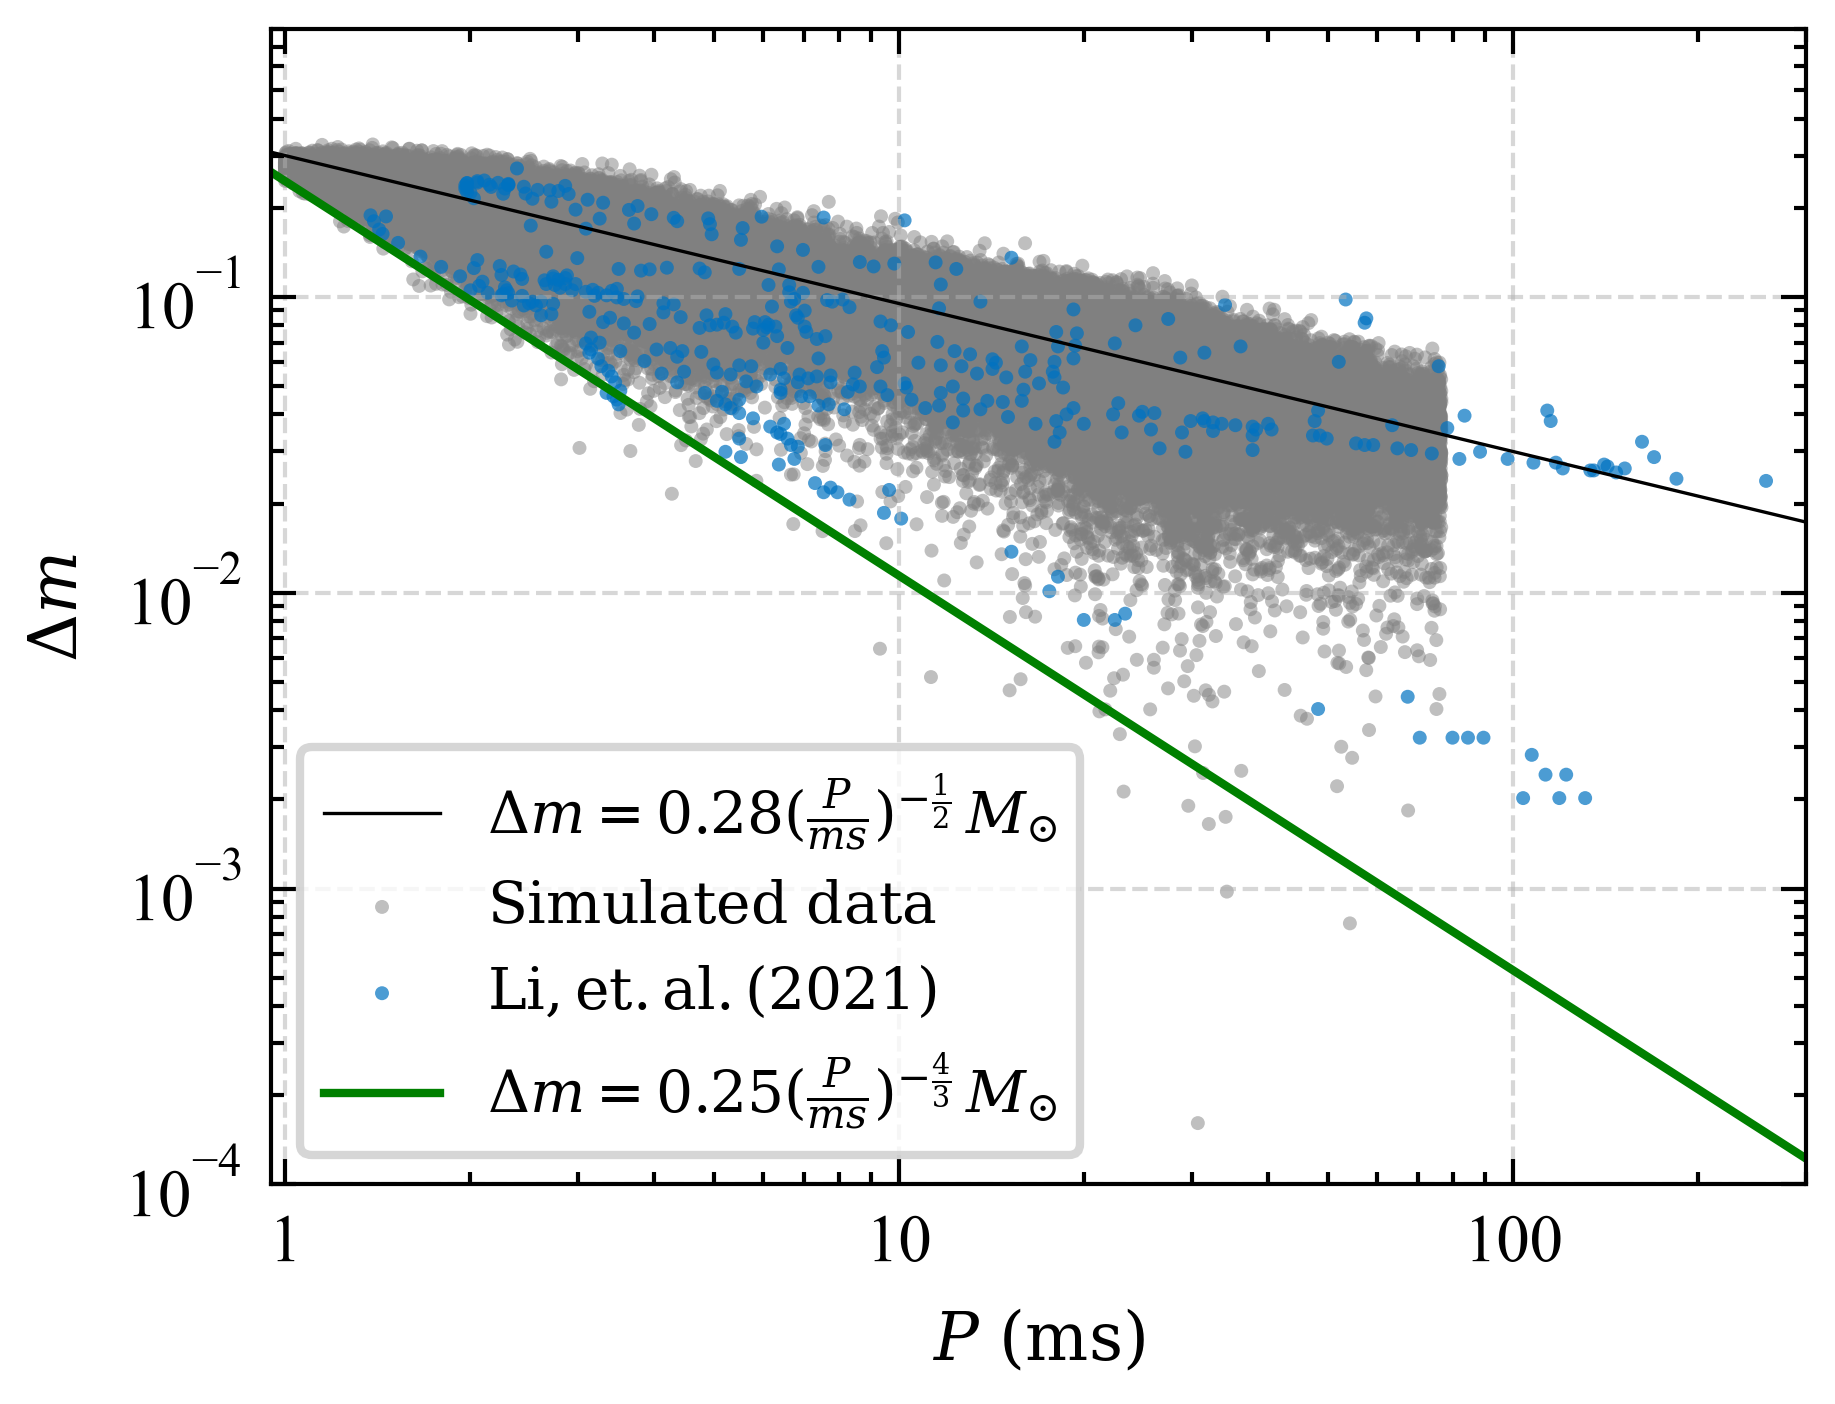

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

xx=np.linspace(0.00023,0.3,1000)
s_deltam_all=np.loadtxt('zhenwei2021.txt')

plt.figure()
plt.grid(which='major', linestyle='--',alpha=0.5)
plt.plot(xx,li_acc_m(xx),c='k',ls='-',lw=0.4,label=r'${\Delta m=0.28(\frac{P}{ms})^{-\frac{1}{2}}\,M_{\odot}}$')

plt.scatter(pran,delta_m_birth_ran,s=2.8,lw=0.4,facecolor='grey',edgecolors='none',alpha=0.5,label=r'$\rm{Simulated\,\, data}$')
plt.scatter(s_deltam_all[:,0],s_deltam_all[:,1],s=2.8,lw=0.1,facecolor='#0072c1',edgecolors='none',alpha=0.7,label=r'$\rm{Li, et. al. (2021)}$')
plt.plot(xx,tauris_acc_m(xx),c='green',label=r'${\Delta m=0.25(\frac{P}{ms})^{-\frac{4}{3}}\,M_{\odot}}$')

plt.yscale('log')#calculate the equilibrium state: p0

plt.xlabel(r'$P\,\,(\rm{ms})$')
plt.ylabel(r'$\Delta m$')
plt.legend(frameon=True,fontsize=7)
plt.xscale('log')
locs, labels = plt.xticks()  # Get the current locations and labels.

plt.xticks([1.e-5, 1.e-4 ,1.e-3 ,1.e-2, 1.e-1, 1.e+0, 1.e+1],['0.01','0.1','1','10','100','1000','10000'])
plt.xlim(0.00095,0.3)
plt.ylim(10**(-4),0.8)

#plt.savefig('simulated_p_dm.jpg')
plt.show()

In [4]:
import astropy.units as unit
import astropy.constants as const

const_I = 1.4e45 * unit.g * unit.cm**2
rmag = 22 * unit.km
coeff = 3 * np.pi * const_I / (const.G * rmag)**0.5 / unit.solMass**1.5
def p_min(m,delta_m):
    """
    calculate the minimum spin period of NS 
    paramaters:
    ----
    m: initial NS mass, unit: solar mass
    delta_m: accreted mass by NS , unit: solar mass
    ----
    return:
    the minimum spin period, unit: s
    """
    return coeff.decompose()/ (m**(3/2) - (m-delta_m)**(3/2) )

def meq(m,p):
    return m - (m**(3/2) - (coeff/ (p*unit.s)).decompose() )**(2/3)

def tauris_acc_m_fig(p_eq,m_ini):
    """
    calculate an accreted mass given an equilibrium period
    using an initial mass of 1.4 M_Sun
    see https://arxiv.org/abs/1206.1862  Eq.14
    paramaters:
    -----
    p_eq: the period at equilibrium state, unit: s
    -----
    return :
    the accreted mass, unit: Solar mass
    """
    return 0.22*(m_ini**(1/3))/(p_eq*1000)**(4/3)

In [5]:
import pandas as pd
spin_samp_data=pd.read_csv('spin_up_ap4mr_samp.txt', sep=' ')

In [6]:
spin_samp_data

,m,mdot,R,cosa,phi,wc,samp_A,p_ran,pdot_ran,p0_obs,pdot_int,dm_ran,m_birth_ran
0,1.339459,0.338377,11.447678,0.210001,0.599761,0.269334,4.296733e-16,0.016289,1.774186e-18,0.028462,1.015396e-18,0.010520,1.328939
1,1.333125,1.255424,11.448647,-0.970294,1.248109,0.666601,5.490735e-16,0.014664,1.970782e-18,0.028462,1.015396e-18,0.008904,1.324220
2,1.338235,0.032573,11.447865,-0.510609,0.676263,0.809744,3.151213e-16,0.018604,1.553415e-18,0.028462,1.015396e-18,0.006095,1.332140
3,1.338779,0.100890,11.447782,0.391754,1.373454,0.995375,1.405149e-16,0.026299,1.098914e-18,0.028462,1.015396e-18,0.003586,1.335193
4,1.323846,0.090047,11.450066,0.575261,0.933243,0.747259,2.237620e-16,0.021544,1.341413e-18,0.028462,1.015396e-18,0.005095,1.318752
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1.971212,0.301882,11.060988,0.883611,0.882853,0.787645,8.292514e-16,0.007543,1.226627e-18,0.039123,2.364853e-19,0.029027,1.942186
174996,2.020069,0.544313,10.983291,0.387275,1.120350,0.609491,5.438766e-16,0.009037,1.023775e-18,0.039123,2.364853e-19,0.025219,1.994850
174997,1.935343,0.622949,11.111448,0.107690,1.156494,0.625929,6.325230e-16,0.008471,1.092216e-18,0.039123,2.364853e-19,0.026500,1.908843
174998,2.054929,0.208066,10.911900,0.039466,0.786401,0.464650,4.126525e-16,0.010172,9.095192e-19,0.039123,2.364853e-19,0.023762,2.031167


In [7]:
p_dm_ana=np.zeros((35,5))
for i in range(35):
    p_dm_ana[i,0]=np.round(np.mean(spin_samp_data['p_ran'][i*5000:(i+1)*5000]*1000),1)
    p_dm_ana[i,1]=np.std(spin_samp_data['p_ran'][i*5000:(i+1)*5000]*1000)
    p_dm_ana[i,2]=np.round(np.mean(spin_samp_data['dm_ran'][i*5000:(i+1)*5000]),3)
    p_dm_ana[i,3]=np.std(spin_samp_data['dm_ran'][i*5000:(i+1)*5000])
    p_dm_ana[i,4]=np.mean(spin_samp_data['m'][i*5000:(i+1)*5000])

In [8]:
import numpy as np
import astropy
import astropy.units as unit
import astropy.constants as const
import pandas as pd


def t_c(p,pdot):
    """
    callculate the characteristic age given p and pdot
    paramaters:
    -----
    p,pdot: i.e. period and period derivative; units= s , none
    return :
    the characteristic age; unit = Gyr
    
    """
    return ( ((p/(2*pdot))*unit.s).to(unit.Gyr) ).value #unit Gyr

def p_mid_sol(p,p_dot,Amax):
    """
    slove the intersection of two lines between the spin-up line and constatnt magnetic field lines to get period
    paramaters:
    ------
    input: p, p_dot, i.e. intrinsic period and period derivative
    return: 
    p_intsect, i.e. the period at the intersection between the spin-up line and the evolution trace of constant magnetic field
    """
    return (p_dot * p / Amax)**(3/7)

def p_dot_mid_sol(p,p_dot,Amax):
    """
    slove the intersection of two lines between the spin-up line and constatnt magnetic field lines to get pdot
    paramaters:
    ------
    input: p, p_dot, i.e. intrinsic period and period derivative
    return: 
    p_dot_intsect, i.e. the period derivative at the intersection between the spin-up line and the evolution trace of constant magnetic field
    """
    return ( (p_dot * p / (Amax))**(4/7) ) * Amax


def pdot_mag(p,B_mag):
    """
    get Pdot for a constant magnetic field 
    paramaters:
    -------
    p: the period, uni, s
    B_mag: the value of constant magnetic field, unit: G 
    -------
    return:
    p_dot
    
    """
    return (B_mag / 3.2e19)**2 / p
    

def pdot_year(p,year):
    """
    get Pdot for a constant age
    paramaters:
    -------
    p: the period, uni, s
    year: the value of the constant age, unit: yr
    -------
    return:
    p_dot
    
    """
    return 0.5*p/(year*365*24*60*60)

def delta_t(p,pdot,Amax):
    " note: the p pdot is the current value"
    return t_c(p,pdot) - t_c( p_mid_sol(p,pdot,Amax) ,p_dot_mid_sol(p,pdot,Amax) )

def spin_up_line_A(r, M, R, cosa, phi, wc):
    """
    # give the proportional ratio of the spin-up line 
    # Tauris style, also see my notebook
    
    # r:     r = Mdot / M_Eddinton, [0.01, 3]
    # M:     mass, [1.0, 3.0] 
    # R:     radius, [11, 13]
    # cosa: the Cosine of magnetic inclination angle in U[-1, 1], unit = None
    # phi:   the ratio of magnetospheric boundary, [0.5, 1.4]
    # wc:    criti fastness parameter, [0.25, 1]
    """
    coef1 = (2**(1/6) * const.G ** (5/3)) / (np.pi**(1/3) * const.c**3) * (8 * np.pi * const.c * const.m_p / const.sigma_T) 
    coef2 = 1 / 1.2 * unit.solMass**(2/3) / (0.237 * unit.km)
    coef3 = r * M**(2/3) * (2-cosa*cosa ) * phi**(-7/2) * wc**(7/3)
    coef4 = R * (1 + 4.2 * M / R + 90 * (M / R) ** 4)
    coef = coef1 * coef2 * coef3 / coef4
    return (coef.to(unit.s**(-4/3))).value

def i_mom(m,r):
    """
    calculate the moment of inertia
    paramaters:
    ----
    m: the mass of NS, unit= solar mass
    r: the radius of NS, unit= km
    ----
    return:
    the moment of inertia, unit = g * cm^2
    """
    return ( 0.237*m*r*r*(1+4.2*(m/r)+90*(m/r)**4 ) * ((1 * unit.solMass *unit.km**2 ).to(unit.g * unit.cm**2) ) ).value

def mag_dipole(m,r,p,pdot,cosa):
    """
    calculate the dipole magnetic file with unit (half)
    paramaters:
    ----
    m: the mass of NS, unit= solar mass
    r: the radius of NS, unit= km; the moment of inertia, unit = g * cm^2
    ----
    return:
    the dipole manetic field, unit = Gauss
    """
    return ( (((i_mom(m,r) *unit.g*unit.cm**2 ) * const.mu0*3 *const.c**3 / (8*np.pi**3* (r*unit.km)**6 ) )**0.5\
            * (1/(1-cosa**2))**0.5  * (p*unit.s*pdot)**0.5 ).to(unit.gauss) ).value *  0.5

def mag_combined(m,r,p,pdot,cosa):
    """
    calculate the combined magnetic file with unit (half)
    paramaters:
    ----
    m: the mass of NS, unit= solar mass
    r: the radius of NS, unit= km; the moment of inertia, unit = g * cm^2
    ----
    return:
    the combined manetic field, unit = Gauss
    """
    return ( (((i_mom(m,r) *unit.g*unit.cm**2 ) * const.mu0 *const.c**3 / (4*np.pi**3* (r*unit.km)**6 ) )**0.5\
            * (1/(2-cosa**2))**0.5  * (p*unit.s*pdot)**0.5 ).to(unit.gauss) ).value   *  0.5

def r_a(m,r,p,pdot,cosa,mdot):
    """
    calculate the Alfv´en radius defined as the location where the magnetic energy density
    paramaters:
    ---
    m: the mass of NS, unit= solar mass
    p: the period of pulsar, unit = s
    pdot: d p / d t, unit =None
    cosa: the Cosine of magnetic inclination angle in U[-1, 1], unit = None
    mdot: the ratio of  accretion, the odds of the Eddington accretion limit, unit = Medd
    ---
    return:
    the Alfv´en radius, unit = km
    """
    return 22 * (mag_combined(m,r,p,pdot,cosa)/10**8)**(4/7) * (mdot/0.1)**(-2/7)*(m/1.4)**(-5/7)

def dm_given_pmin(pmin, m,r,p,pdot,cosa,mdot,phi):
    """
    calculate the accreted mass given minimum period
    paramaters:
    ---
    pmin: the minimum period at equilibrum state, unit = s
    m: the mass of NS, unit= solar mass
    r: the radius of NS, unit = km
    p: the period of pulsar, unit = s
    pdot: d p / d t, unit =None
    cosa: the Cosine of magnetic inclination angle in U[-1, 1], unit = None
    mdot: the ratio of  accretion, the ratio of the Eddington accretion limit, unit = Medd
    psi: a parameter describing the size of magnetosphere, unit = None
    ---
    return:
    the accreted mass, unit = solar mass
    """
    return ( m*unit.solMass - ( (m*unit.solMass)**(3/2) - 3 * np.pi * 1.4*i_mom(m,r)*unit.g*unit.cm**2  / \
                             (const.G * phi * r_a(m,r,p,pdot,cosa,mdot)*unit.km )**0.5 * (1/ (pmin*unit.s )) )**(2/3) ).value

def tauris_acc_m_fig_up(p_eq,m_ini,s):
    """
    calculate an accreted mass given an equilibrium period
    using an initial mass of 1.4 M_Sun
    see https://arxiv.org/abs/1206.1862  Eq.14
    paramaters:
    -----
    p_eq: the period at equilibrium state, unit: s
    -----
    return :
    the accreted mass, unit: Solar mass
    """
    return s*(m_ini**(1/3))/(p_eq*1000)**(4/3)

In [9]:
def p_dm_m1(p):
    return 0.2*p**(-1)

# plot average errors for m

In [10]:
p_m=np.zeros(35)
p_std=np.zeros(35)
m_m=np.zeros(35)
m_std=np.zeros(35)

for i in range(35):
    p_m[i]=np.mean(spin_samp_data['p_ran'][i*5000:(i+1)*5000])
    p_std[i]=np.std(spin_samp_data['p_ran'][i*5000:(i+1)*5000])
    m_m[i]=np.mean(spin_samp_data['dm_ran'][i*5000:(i+1)*5000])
    m_std[i]=np.std(spin_samp_data['dm_ran'][i*5000:(i+1)*5000])

In [11]:
import bilby
import os
import glob
import numpy as np
from scipy import interpolate
import corner.corner
#import scienceplots
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01] [Text(1e-05, 0, '$\\mathdefault{10^{-5}}$'), Text(0.0001, 0, '$\\mathdefault{10^{-4}}$'), Text(0.001, 0, '$\\mathdefault{10^{-3}}$'), Text(0.01, 0, '$\\mathdefault{10^{-2}}$'), Text(0.1, 0, '$\\mathdefault{10^{-1}}$'), Text(1.0, 0, '$\\mathdefault{10^{0}}$'), Text(10.0, 0, '$\\mathdefault{10^{1}}$')]


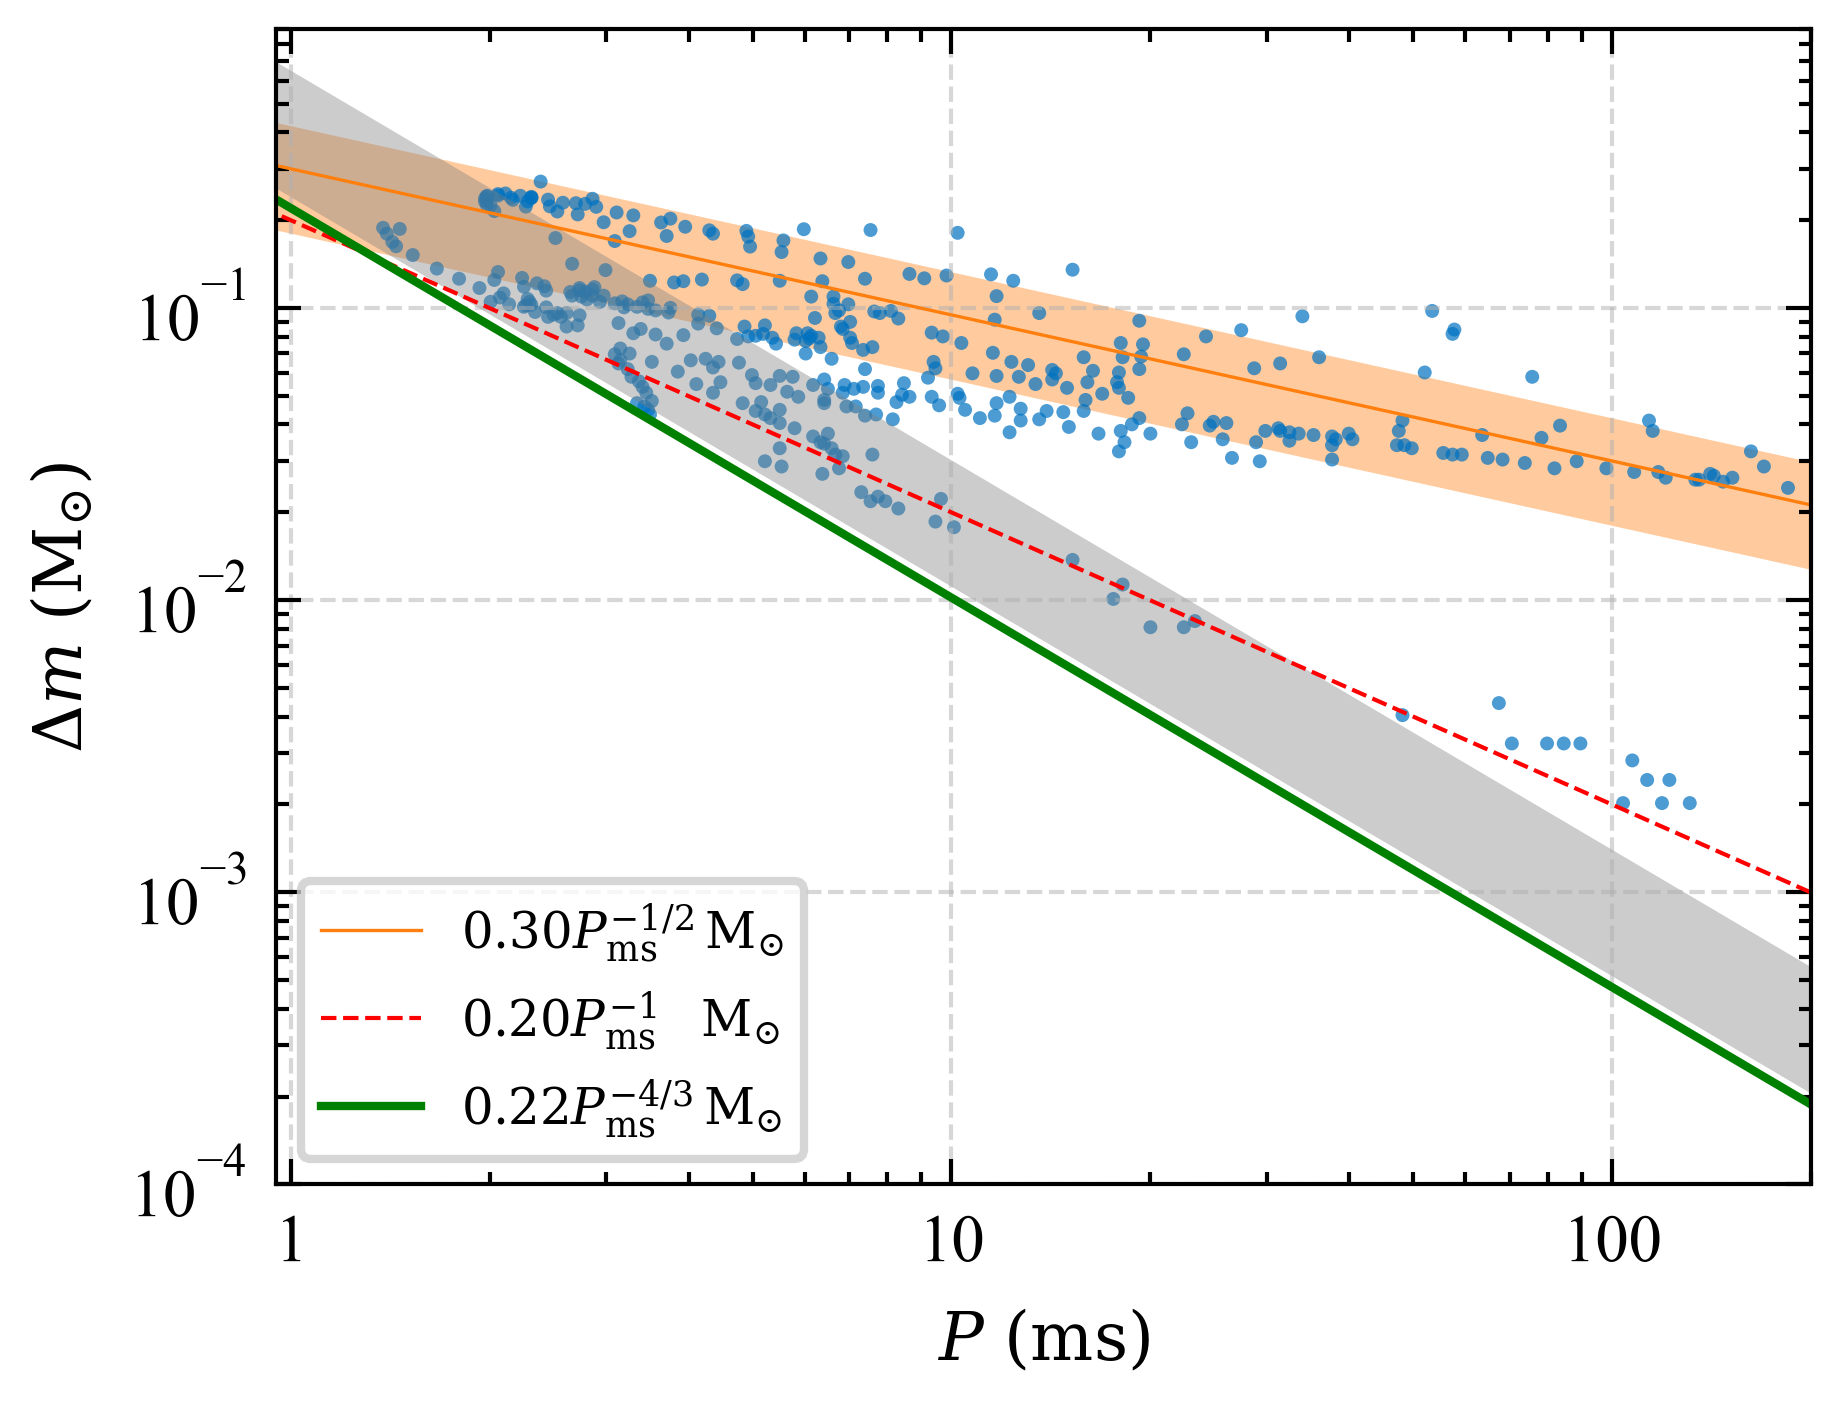

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

xx=np.linspace(0.00023,0.3,1000)
s_deltam_all=np.loadtxt('zhenwei2021.txt')
delt=0.20
plt.figure()
plt.grid(which='major',linestyle='--',alpha=0.5)
plt.plot(xx,li_acc_m(xx),c='#ff7f0e',ls='-',lw=0.4,label=r'${0.30P_{\rm{ms}}^{-1/2}\,\rm{M_{\odot}}}$')
plt.fill_between(xx,li_acc_m(xx)*(1+2*delt),li_acc_m(xx)*(1-2*delt),facecolor='#ff7f0e',edgecolor='None',alpha=0.4)

#plt.scatter(spin_samp_data['p_ran'][::10],spin_samp_data['dm_ran'][::10],s=2.8,lw=0.4,facecolor='grey',edgecolors='none',alpha=0.5,label=r'$\rm{ANA\,\,corrections}$')
plt.scatter(s_deltam_all[:,0],s_deltam_all[:,1],s=2.8,lw=0.1,facecolor='#0072c1',edgecolors='none',alpha=0.7)


#plt.errorbar(x=p_m,y=m_m,xerr=p_std,yerr=m_std,fmt='o',c='k',lw=0.5,capsize=1,ms=2,alpha=0.4)
#plt.plot(p_min(1.4,delta_m),delta_m,ls='--',lw=0.5,color='r',label=r'${0.20P_{{\rm{ms}}}^{-1}\,\rm{M_{\odot}}}$' )
plt.plot(xx,p_dm_m1(xx*1000),ls='--',lw=0.5,color='r',label=r'${0.20P_{{\rm{ms}}}^{-1}\,\,\,\,\,\rm{M_{\odot}}}$' )

plt.plot(xx,tauris_acc_m_fig(xx,1),c='green',label=r'${0.22{P}_{{\rm{ms}}}^{-4/3}\,\rm{M_{\odot}}}$')

plt.fill_between(xx,tauris_acc_m_fig_up(xx,1,0.24),tauris_acc_m_fig_up(xx,1,0.65),facecolor='grey',edgecolors='none',alpha=0.4)
#plt.plot(xx,tauris_acc_m_fig_up(xx,1,0.44),c='k',ls='-',lw=0.4,label=r'${0.44P_{\rm{ms}}^{-1/2}\,\rm{M_{\odot}}}$')

# add Tauris12 figure6
delta_m=np.linspace(0.001,0.3,1000)
peq=np.linspace(0.0001,0.1,1000)

#plt.scatter(li_data_all['Pspin end MT(s)'],li_data_all['delta Mns'],s=0.2)

#plt.plot(xx,0.21*(xx*1000)**(-0.7),color='purple' )

plt.yscale('log')#calculate the equilibrium state: p0

plt.xlabel(r'$P\,\,(\rm{ms})$')
plt.ylabel(r'$\Delta m \,\,(\rm{M_{\odot}})$')
plt.legend(frameon=True,fontsize=6)
plt.xscale('log')
locs, labels = plt.xticks()  # Get the current locations and labels.
print(locs, labels)
plt.xticks([1.e-5, 1.e-4 ,1.e-3 ,1.e-2, 1.e-1, 1.e+0, 1.e+1],['0.01','0.1','1','10','100','1000','10000'])
plt.xlim(0.00095,0.2)
plt.ylim(10**(-4),0.9)
#plt.savefig('ext_fig2_new.pdf')
plt.show();

In [ ]:
xx,li_acc_m(xx) 0.3
xx,p_dm_m1(xx*1000) 0.2
xx,tauris_acc_m_fig(xx,1) 0.22
xx,tauris_acc_m_fig_up(xx,1,0.24),tauris_acc_m_fig_up(xx,1,0.65) grey
xx,li_acc_m(xx)*(1+2*delt),li_acc_m(xx)*(1-2*delt) orange

In [15]:
data_for_ED_figure2=np.zeros((8,1000))
data_for_ED_figure2[0,:]=xx
data_for_ED_figure2[1,:]=li_acc_m(xx)
data_for_ED_figure2[2,:]=p_dm_m1(xx*1000)
data_for_ED_figure2[3,:]=tauris_acc_m_fig(xx,1)
data_for_ED_figure2[4,:]=tauris_acc_m_fig_up(xx,1,0.24)
data_for_ED_figure2[5,:]=tauris_acc_m_fig_up(xx,1,0.65)
data_for_ED_figure2[6,:]=li_acc_m(xx)*(1+2*delt)
data_for_ED_figure2[7,:]=li_acc_m(xx)*(1-2*delt)

In [19]:
np.savetxt('data_for_ED_figure2.txt',data_for_ED_figure2)

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01] [Text(1e-05, 0, '$\\mathdefault{10^{-5}}$'), Text(0.0001, 0, '$\\mathdefault{10^{-4}}$'), Text(0.001, 0, '$\\mathdefault{10^{-3}}$'), Text(0.01, 0, '$\\mathdefault{10^{-2}}$'), Text(0.1, 0, '$\\mathdefault{10^{-1}}$'), Text(1.0, 0, '$\\mathdefault{10^{0}}$'), Text(10.0, 0, '$\\mathdefault{10^{1}}$')]


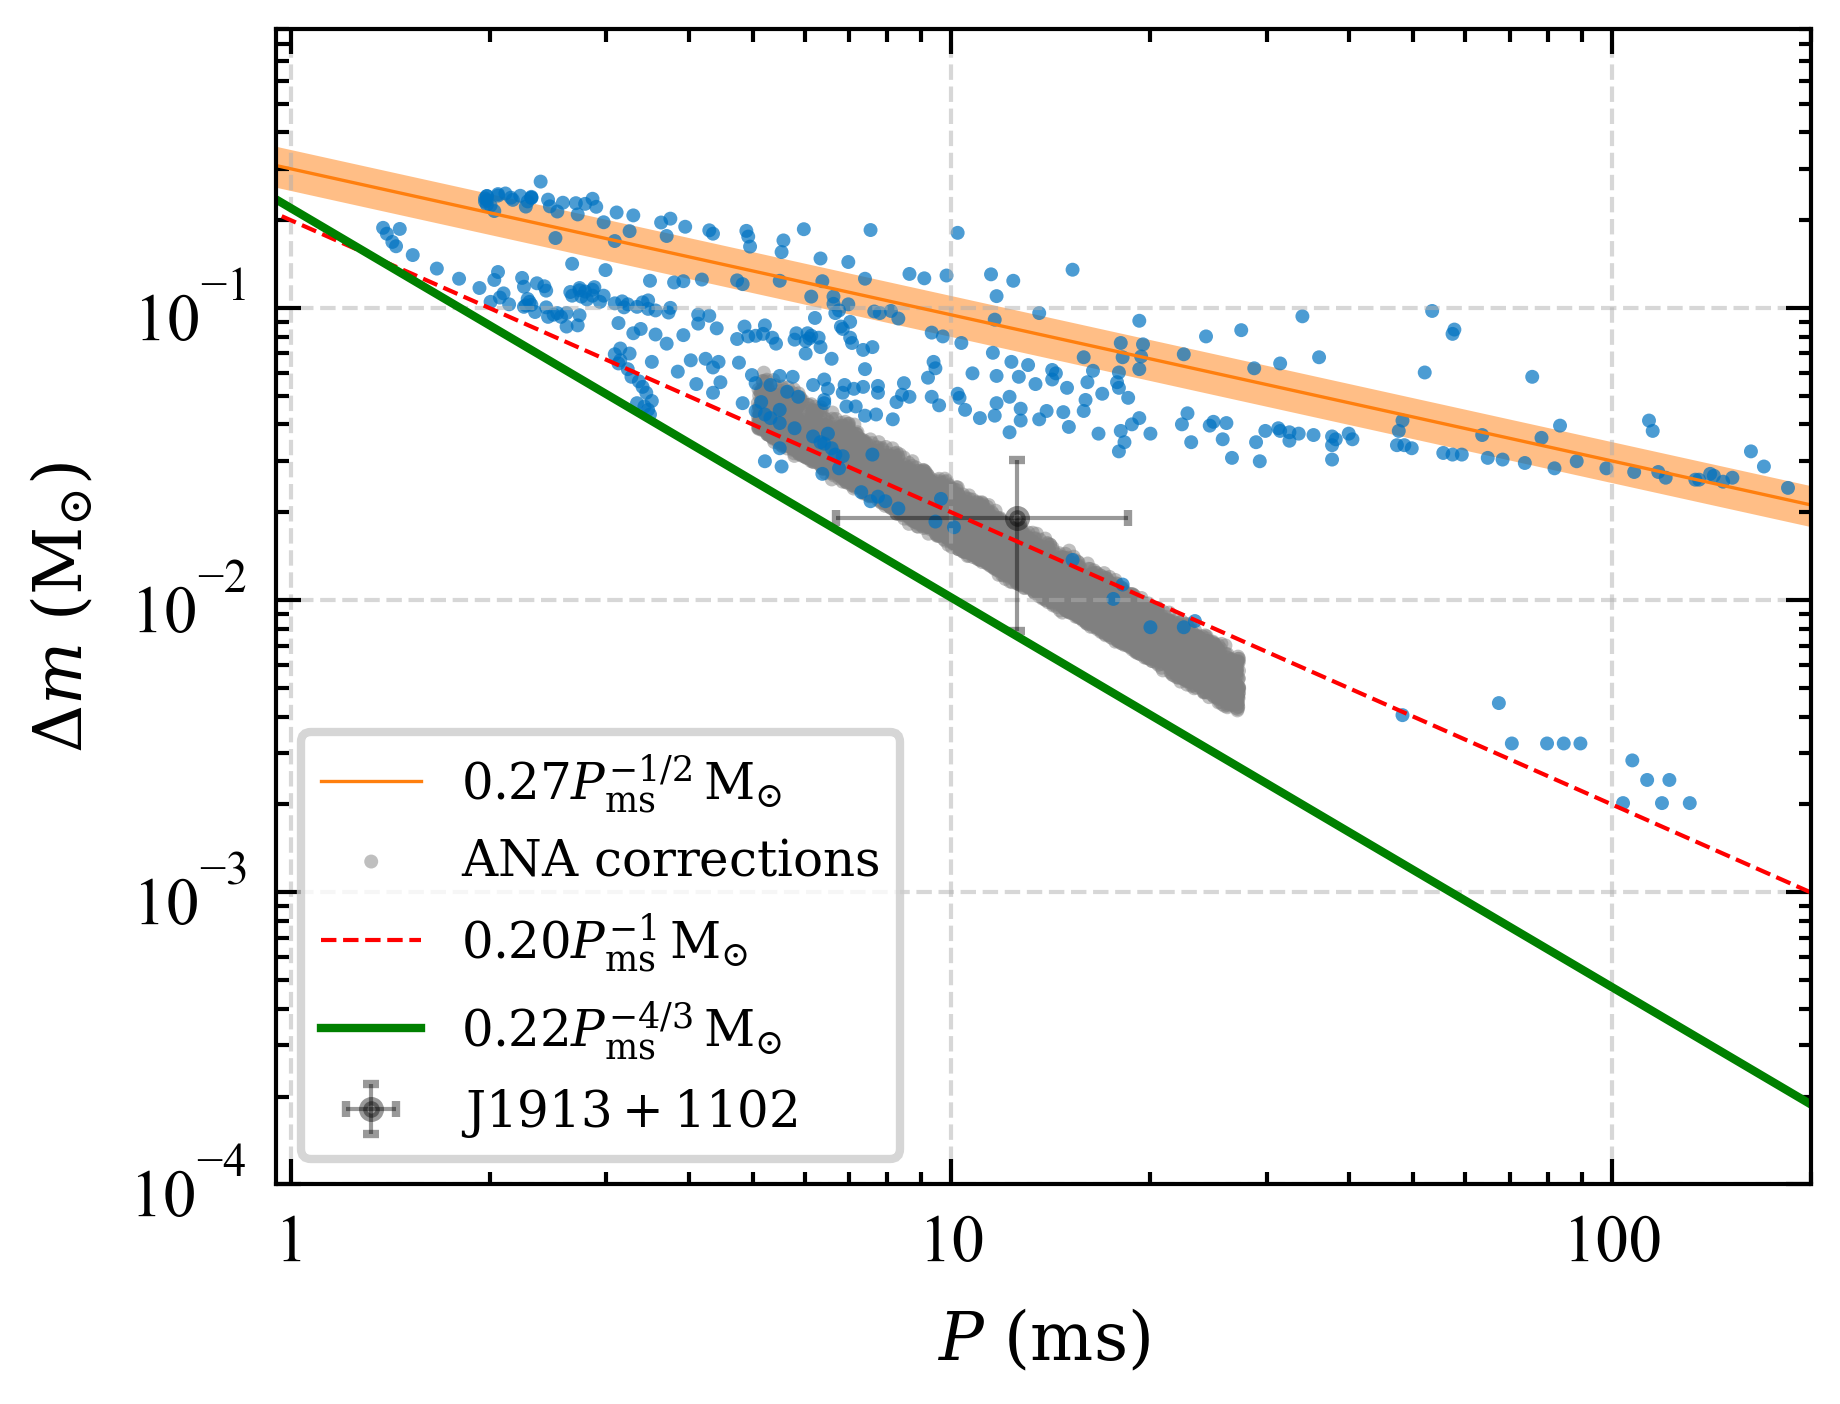

In [23]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

xx=np.linspace(0.00023,0.3,1000)
s_deltam_all=np.loadtxt('zhenwei2021.txt')
delt=0.16
plt.figure()
plt.grid(which='major',linestyle='--',alpha=0.5)
plt.plot(xx,li_acc_m(xx),c='#ff7f0e',ls='-',lw=0.4,label=r'${0.27P_{\rm{ms}}^{-1/2}\,\rm{M_{\odot}}}$')
plt.fill_between(xx,li_acc_m(xx)*(1+delt),li_acc_m(xx)*(1-delt),facecolor='#ff7f0e',edgecolor='None',alpha=0.5)

plt.scatter(spin_samp_data['p_ran'][6*5000:7*5000],spin_samp_data['dm_ran'][6*5000:7*5000],s=2.8,lw=0.4,facecolor='grey',edgecolors='none',alpha=0.5,label=r'$\rm{ANA\,\,corrections}$')
plt.scatter(s_deltam_all[:,0],s_deltam_all[:,1],s=2.8,lw=0.1,facecolor='#0072c1',edgecolors='none',alpha=0.7)


plt.errorbar(x=p_m[6],y=m_m[6],xerr=p_std[6],yerr=m_std[6],fmt='o',c='k',lw=0.5,capsize=1,ms=2,alpha=0.4,label=r'$\rm J1913+1102$')
#plt.plot(p_min(1.4,delta_m),delta_m,ls='--',lw=0.5,color='r',label=r'${0.20P_{{\rm{ms}}}^{-1}\,\rm{M_{\odot}}}$' )
plt.plot(xx,p_dm_m1(xx*1000),ls='--',lw=0.5,color='r',label=r'${0.20P_{{\rm{ms}}}^{-1}\,\rm{M_{\odot}}}$' )

plt.plot(xx,tauris_acc_m_fig(xx,1),c='green',label=r'${0.22{P}_{{\rm{ms}}}^{-4/3}\,\rm{M_{\odot}}}$')

# add Tauris12 figure6
delta_m=np.linspace(0.001,0.3,1000)
peq=np.linspace(0.0001,0.1,1000)



plt.yscale('log')#calculate the equilibrium state: p0

plt.xlabel(r'$P\,\,(\rm{ms})$')
plt.ylabel(r'$\Delta m \,\,(\rm{M_{\odot}})$')
plt.legend(frameon=True,fontsize=6)
plt.xscale('log')
locs, labels = plt.xticks()  # Get the current locations and labels.
print(locs, labels)
plt.xticks([1.e-5, 1.e-4 ,1.e-3 ,1.e-2, 1.e-1, 1.e+0, 1.e+1],['0.01','0.1','1','10','100','1000','10000'])
plt.xlim(0.00095,0.2)
plt.ylim(10**(-4),0.9)

#plt.savefig('simulated_p_dm_ana_comb.jpg')
plt.show()